In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [2]:
total_consumption_df = pd.read_csv(r"Calkowita_konsumpcja_dla_Polski/Total Load - Day Ahead _ Actual_202301010000-202401010000.csv")
sell_prices_df = pd.read_csv(r"Cena_sprzedazy_energii\PL_CENY_RYN_EN_2023.csv")
energy_production_df = pd.read_csv(r"Produkcja_energii\ninja_pv_50.1400_20.0637_corrected.csv")
consumption_profile_hourly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_godzinowo.csv")
consumption_profile_monthly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_po_miesiacu.csv")

MAE: 0.0771, RMSE: 0.1702


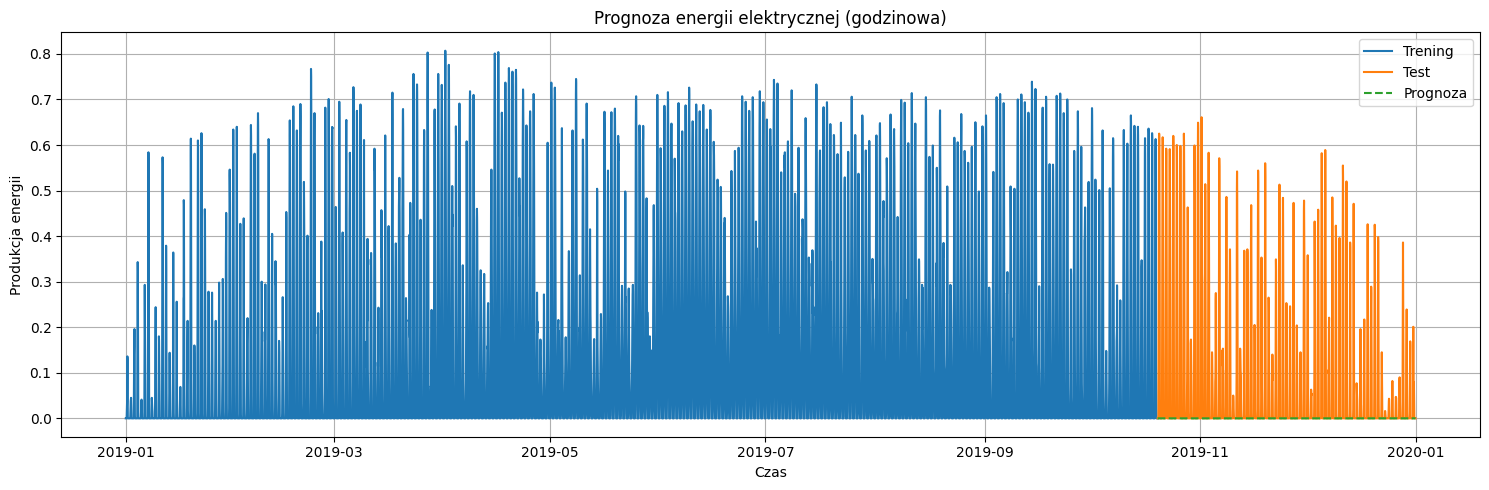

MAE: 0.0771, RMSE: 0.1702


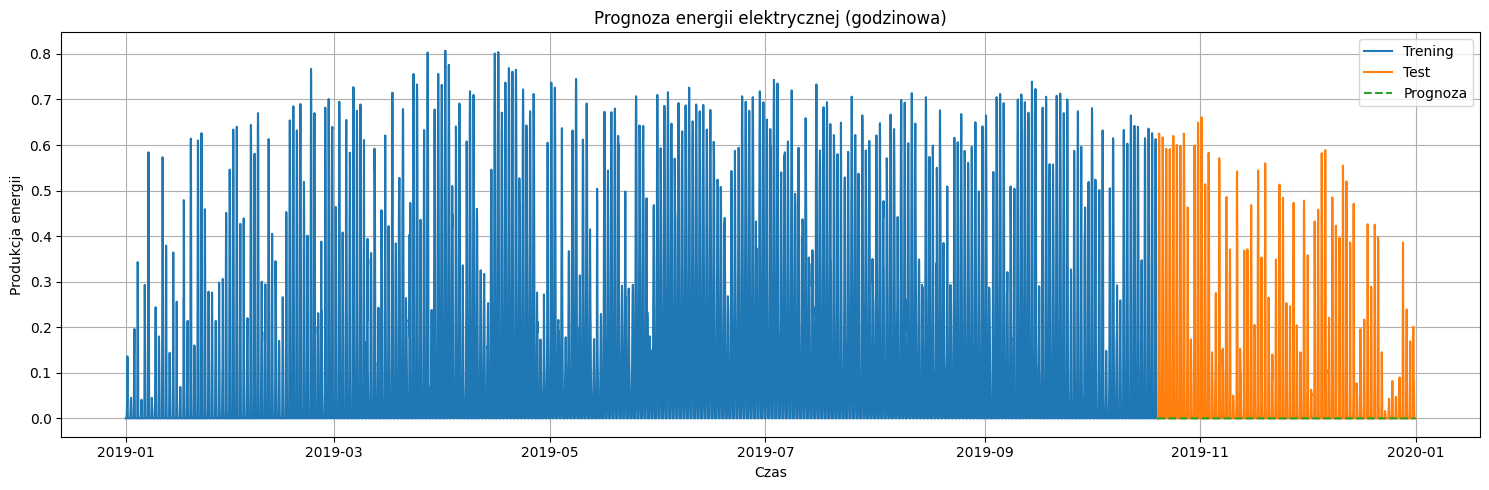

MAE: 0.0771, RMSE: 0.1702


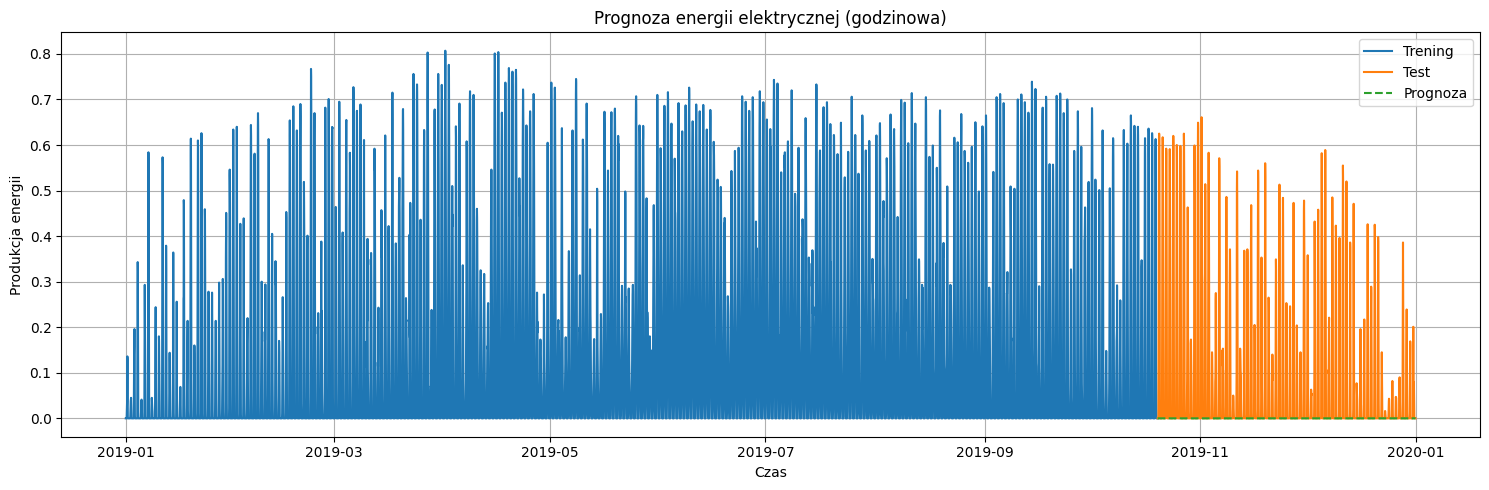

MAE: 0.0771, RMSE: 0.1701


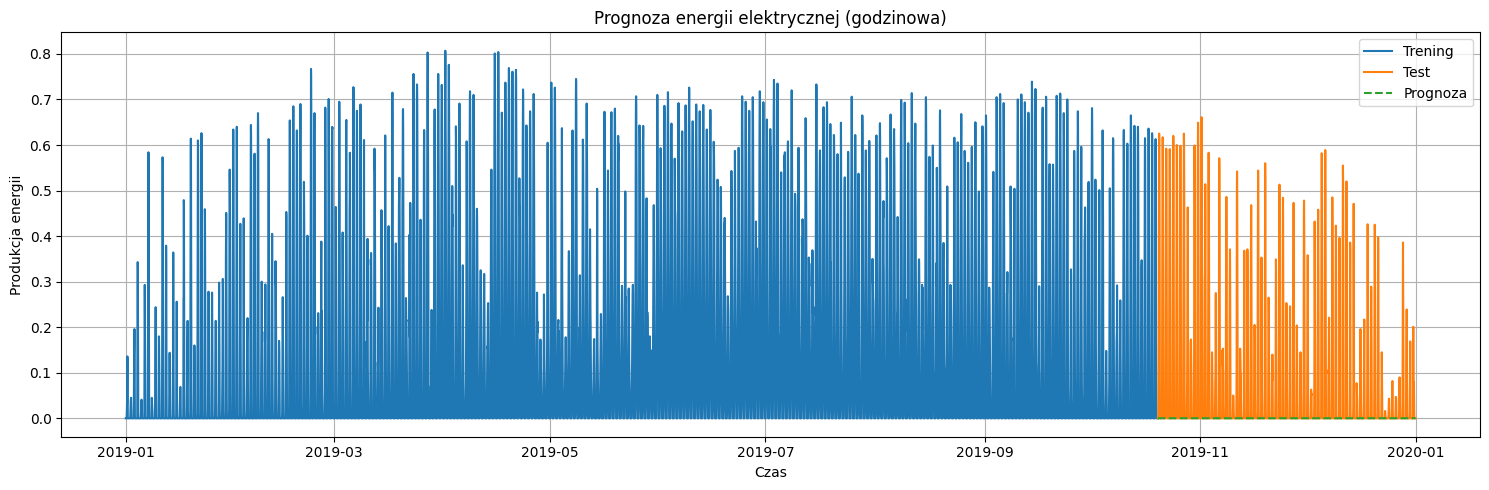

MAE: 0.0771, RMSE: 0.1702


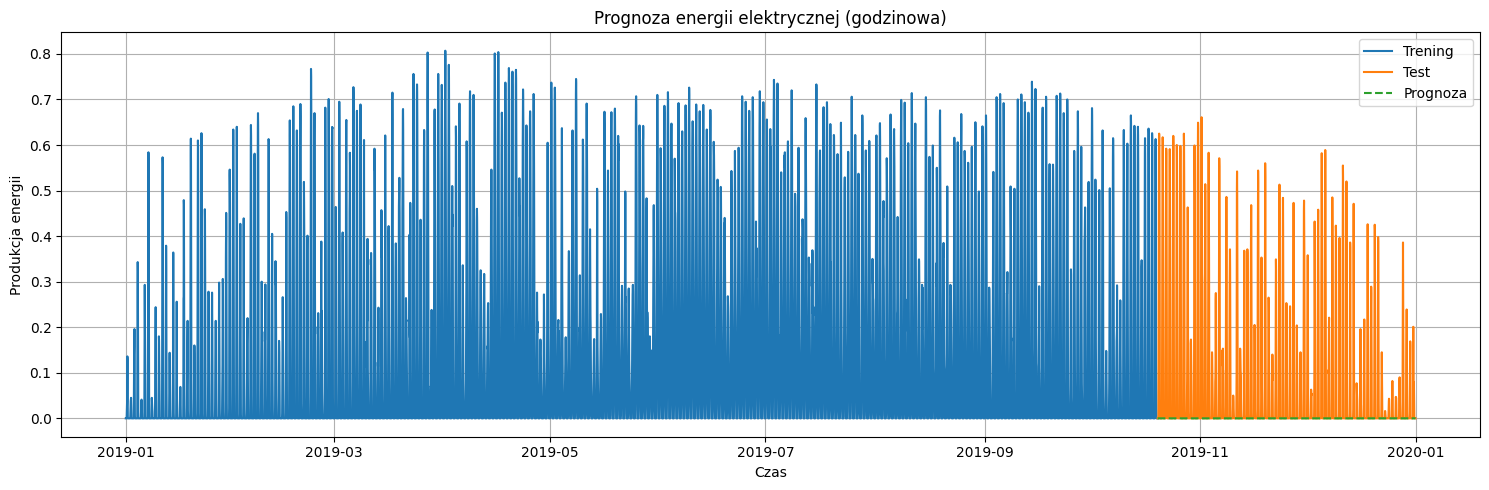

MAE: 0.0771, RMSE: 0.1702


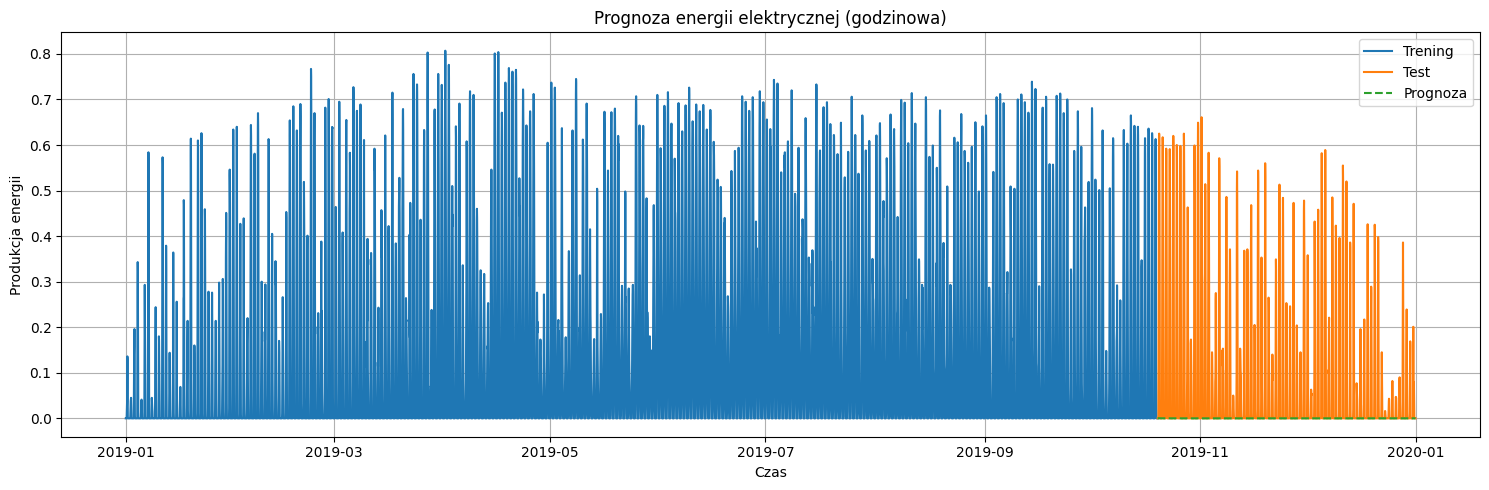

MAE: 0.0771, RMSE: 0.1702


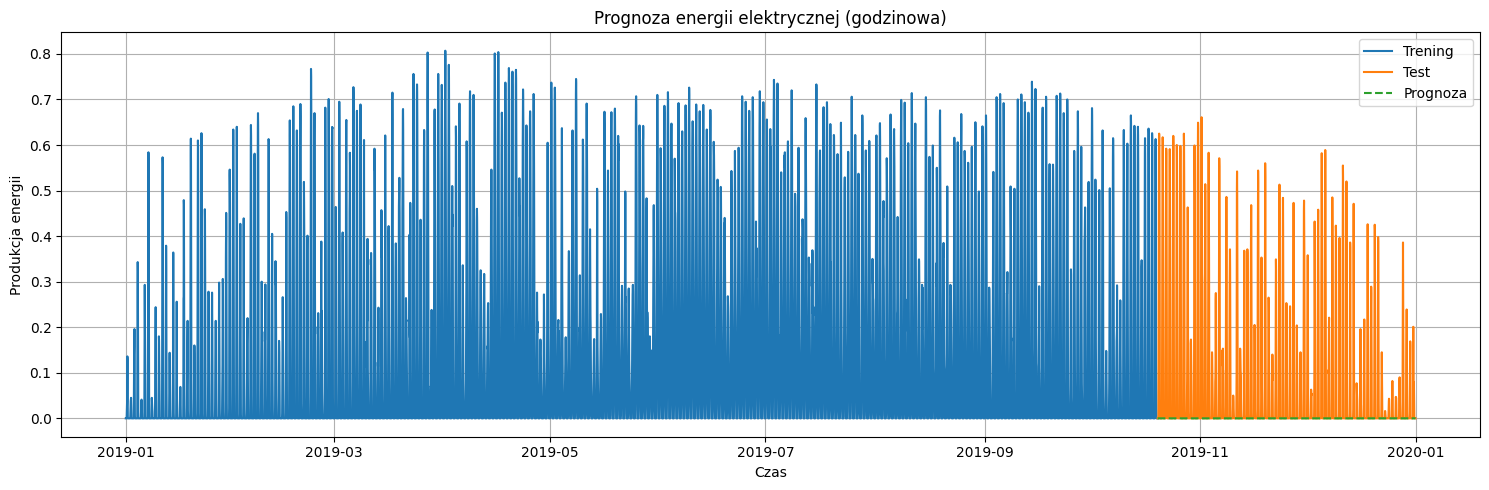

MAE: 0.0771, RMSE: 0.1702


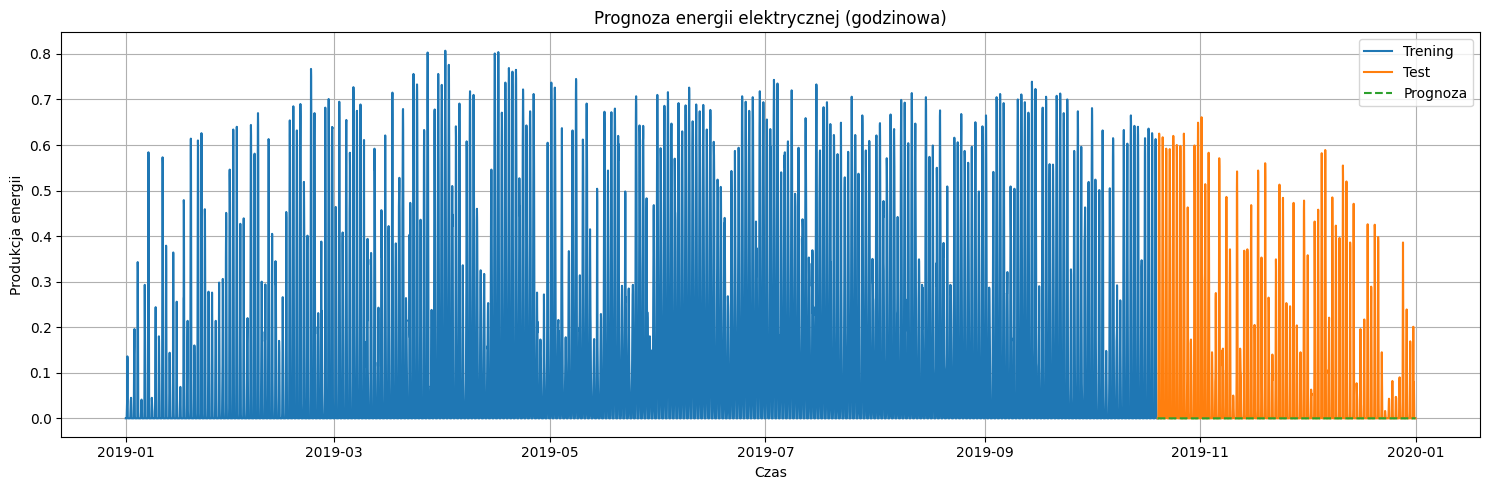

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# === 1. Wczytanie danych ===
df = pd.read_csv("Produkcja_energii/ninja_pv_50.1400_20.0637_corrected.csv")
df['time'] = pd.to_datetime(df['time'])

# Ustawienie indeksu czasowego (godzinowego)
df = df.set_index('time')
df = df[['electricity']]  # tylko kolumna z energią

# === 2. Podział na zbiór treningowy/testowy ===
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# === 3. Grid search (ograniczony zakres) ===
# Mniejsze zakresy: p, d, q
p = d = q = range(0, 2)  # tylko 0 lub 1
pdq = list(product(p, d, q))

# Użyjemy tylko modeli bez sezonowości (można dodać sezonowość jeśli dane są np. tygodniowe)
best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        
        test['forecast'] = results.forecast(steps=len(test))
        # === 5. Ocena ===
        mae = mean_absolute_error(test['electricity'], test['forecast'])
        rmse = np.sqrt(mean_squared_error(test['electricity'], test['forecast']))
        print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

        # === 6. Wizualizacja ===
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['electricity'], label='Trening')
        plt.plot(test.index, test['electricity'], label='Test')
        plt.plot(test.index, test['forecast'], label='Prognoza', linestyle='--')
        plt.legend()
        plt.title("Prognoza energii elektrycznej (godzinowa)")
        plt.xlabel("Czas")
        plt.ylabel("Produkcja energii")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        continue

# print(f"Najlepsze parametry SARIMA: {best_order}, AIC: {best_aic}")

# # === 4. Prognoza ===
# forecast = best_model.forecast(steps=len(test))
# test['forecast'] = forecast

# # === 5. Ocena ===
# mae = mean_absolute_error(test['electricity'], test['forecast'])
# rmse = np.sqrt(mean_squared_error(test['electricity'], test['forecast']))
# print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# # === 6. Wizualizacja ===
# plt.figure(figsize=(15, 5))
# plt.plot(train.index, train['electricity'], label='Trening')
# plt.plot(test.index, test['electricity'], label='Test')
# plt.plot(test.index, test['forecast'], label='Prognoza', linestyle='--')
# plt.legend()
# plt.title("Prognoza energii elektrycznej (godzinowa)")
# plt.xlabel("Czas")
# plt.ylabel("Produkcja energii")
# plt.grid(True)
# plt.tight_layout()
# plt.show()



Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.5668
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3880
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1149
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0878 
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0541
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403
Epoch 9/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430
Epoch 10/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0339 
Epoch 11/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 
Epoch 12/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0359
Epoch 13/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288
Epoch 14/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 
Epoch 15/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293
Epoch 16/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

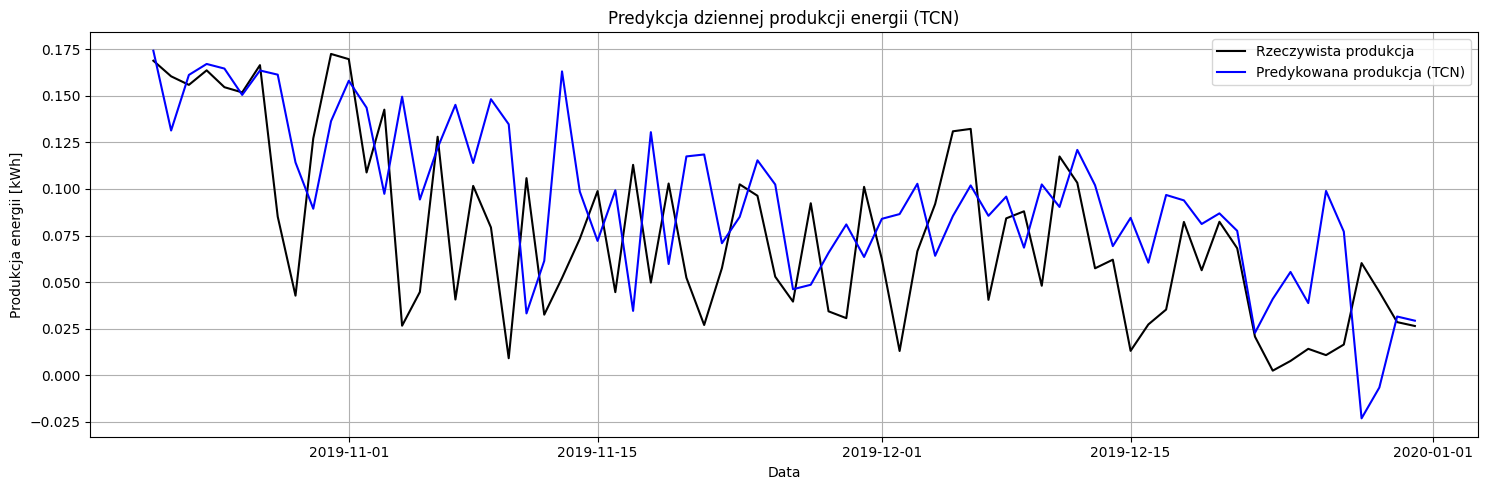

         Data  Rzeczywista produkcja  Predykowana produkcja   Różnica
0  2019-10-21               0.168792               0.174155  0.005363
1  2019-10-22               0.160417               0.131343 -0.029073
2  2019-10-23               0.155833               0.161157  0.005324
3  2019-10-24               0.163625               0.167047  0.003422
4  2019-10-25               0.154583               0.164574  0.009990
..        ...                    ...                    ...       ...
67 2019-12-27               0.016500               0.077109  0.060609
68 2019-12-28               0.060208              -0.023083 -0.083292
69 2019-12-29               0.044792              -0.006545 -0.051337
70 2019-12-30               0.028542               0.031542  0.003000
71 2019-12-31               0.026458               0.029305  0.002846

[72 rows x 4 columns]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie danych ===
df = pd.read_csv("Produkcja_energii/ninja_pv_50.1400_20.0637_corrected.csv")
df['time'] = pd.to_datetime(df['time'])

# Średnia dzienna produkcja
df['date'] = df['time'].dt.date
daily_df = df.groupby('date')['electricity'].mean().reset_index()
daily_df.columns = ['ds', 'y']
daily_df['ds'] = pd.to_datetime(daily_df['ds'])

# === 2. Skalowanie ===
scaler = MinMaxScaler()
scaled_energy = scaler.fit_transform(daily_df[['y']])

# === 3. Tworzenie sekwencji ===
def create_sequences(data, n_steps=7):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(scaled_energy, n_steps)

# === 4. Podział na zbiór treningowy/testowy ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. Model TCN ===
model = Sequential([
    TCN(input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=80, verbose=1)

# === 6. Predykcja ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 7. Ocena ===
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# === 8. Wykres ===
test_dates = daily_df['ds'].iloc[-len(y_test):]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Rzeczywista produkcja', color='black')
plt.plot(test_dates, y_pred, label='Predykowana produkcja (TCN)', color='blue')
plt.title('Predykcja dziennej produkcji energii (TCN)')
plt.xlabel('Data')
plt.ylabel('Produkcja energii [kWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. Tabela różnic ===
diff = y_pred.flatten() - y_test_inv.flatten()
diff_df = pd.DataFrame({
    'Data': test_dates.values,
    'Rzeczywista produkcja': y_test_inv.flatten(),
    'Predykowana produkcja': y_pred.flatten(),
    'Różnica': diff
})
print(diff_df)



Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.4722
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0032
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0023
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0016
Epoch 13/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017
Epoch 14/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015
Epoch 15/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - l

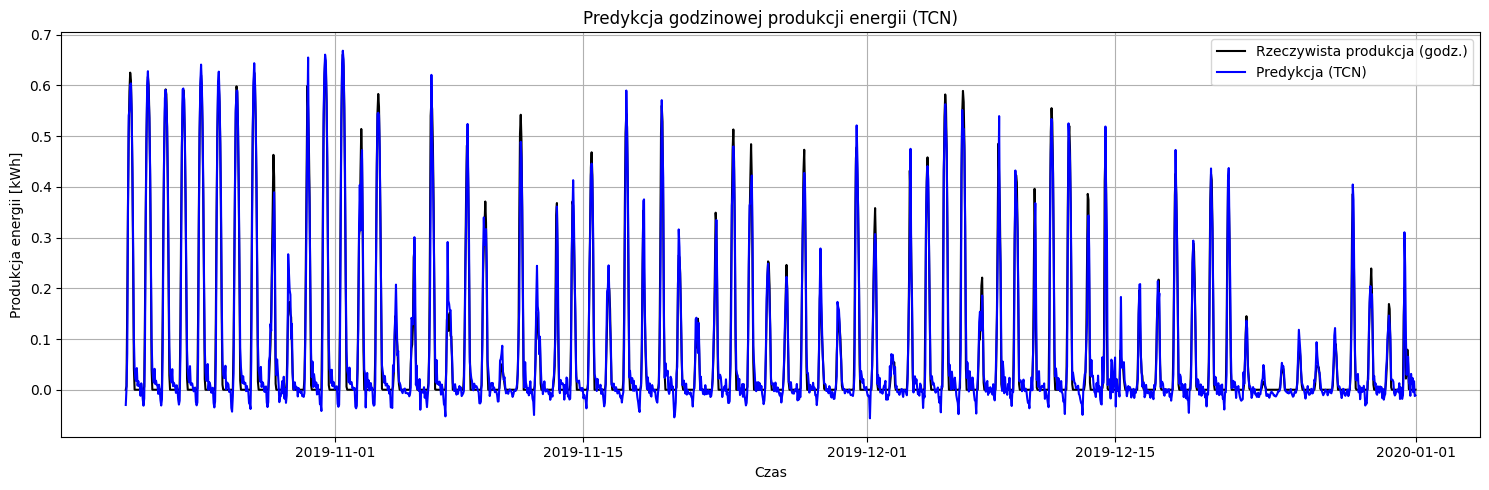

                    Czas  Rzeczywista produkcja  Predykowana produkcja  \
0    2019-10-20 04:00:00                  0.000              -0.030040   
1    2019-10-20 05:00:00                  0.007               0.002234   
2    2019-10-20 06:00:00                  0.166               0.071304   
3    2019-10-20 07:00:00                  0.367               0.351562   
4    2019-10-20 08:00:00                  0.506               0.540763   
...                  ...                    ...                    ...   
1743 2019-12-31 19:00:00                  0.000               0.023149   
1744 2019-12-31 20:00:00                  0.000              -0.004892   
1745 2019-12-31 21:00:00                  0.000               0.016836   
1746 2019-12-31 22:00:00                  0.000              -0.012440   
1747 2019-12-31 23:00:00                  0.000              -0.011105   

       Różnica  
0    -0.030040  
1    -0.004766  
2    -0.094696  
3    -0.015438  
4     0.034763  
...      

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie danych (godzinowych) ===
df = pd.read_csv("Produkcja_energii/ninja_pv_50.1400_20.0637_corrected.csv")
df['time'] = pd.to_datetime(df['time'])
df = df[['time', 'electricity']]
df = df.set_index('time')

# === 2. Skalowanie ===
scaler = MinMaxScaler()
scaled_energy = scaler.fit_transform(df[['electricity']])

# === 3. Tworzenie sekwencji (np. 24h) ===
def create_sequences(data, n_steps=24):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 24
X, y = create_sequences(scaled_energy, n_steps)

# === 4. Podział na zbiór treningowy/testowy ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. Model TCN ===
model = Sequential([
    TCN(input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=1)  # możesz zwiększyć liczbę epok

# === 6. Predykcja ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 7. Ocena ===
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# === 8. Wykres ===
test_dates = df.index[n_steps + split:n_steps + split + len(y_test)]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Rzeczywista produkcja (godz.)', color='black')
plt.plot(test_dates, y_pred, label='Predykcja (TCN)', color='blue')
plt.title('Predykcja godzinowej produkcji energii (TCN)')
plt.xlabel('Czas')
plt.ylabel('Produkcja energii [kWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. Tabela różnic ===
diff = y_pred.flatten() - y_test_inv.flatten()
diff_df = pd.DataFrame({
    'Czas': test_dates.values,
    'Rzeczywista produkcja': y_test_inv.flatten(),
    'Predykowana produkcja': y_pred.flatten(),
    'Różnica': diff
})
print(diff_df)


Trwa trenowanie modelu SARIMA...
                                     SARIMAX Results                                      
Dep. Variable:                        electricity   No. Observations:                 7008
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               14185.871
Date:                            Sun, 01 Jun 2025   AIC                         -28361.741
Time:                                    12:21:51   BIC                         -28327.504
Sample:                                01-01-2019   HQIC                        -28349.940
                                     - 10-19-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2202      0.011     19.717      0.000       0.198       0.242
ma

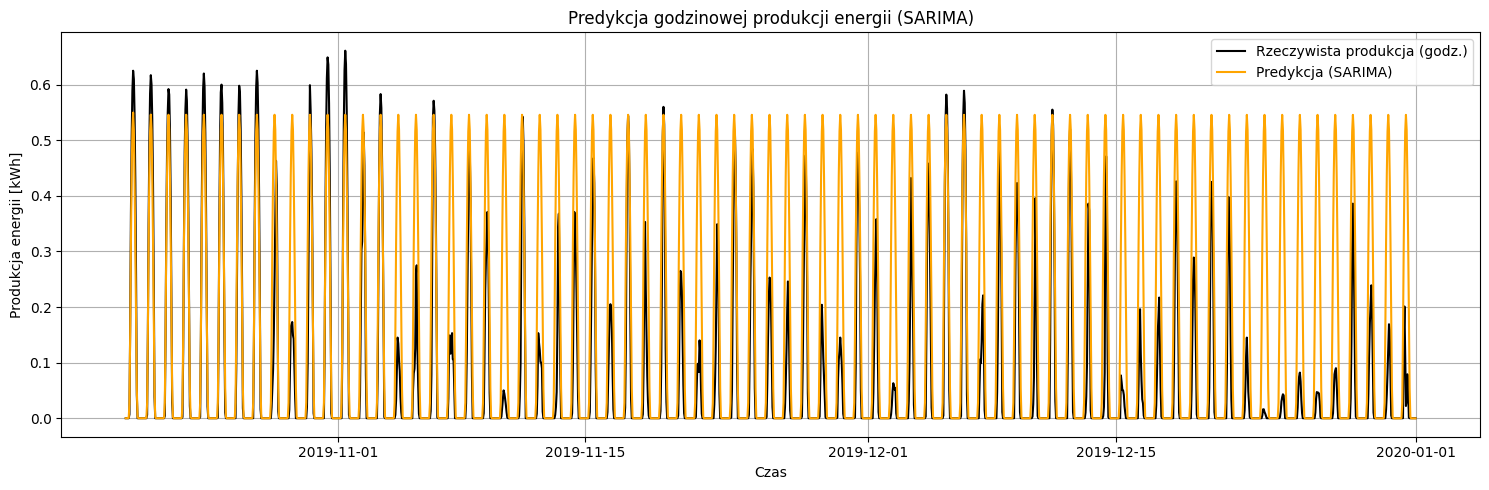

                    Czas  Rzeczywista produkcja  Predykowana produkcja  \
0    2019-10-20 00:00:00                    0.0              -0.000027   
1    2019-10-20 01:00:00                    0.0              -0.000033   
2    2019-10-20 02:00:00                    0.0              -0.000034   
3    2019-10-20 03:00:00                    0.0              -0.000008   
4    2019-10-20 04:00:00                    0.0               0.000762   
...                  ...                    ...                    ...   
1747 2019-12-31 19:00:00                    0.0              -0.000246   
1748 2019-12-31 20:00:00                    0.0              -0.000246   
1749 2019-12-31 21:00:00                    0.0              -0.000246   
1750 2019-12-31 22:00:00                    0.0              -0.000246   
1751 2019-12-31 23:00:00                    0.0              -0.000246   

       Różnica  
0    -0.000027  
1    -0.000033  
2    -0.000034  
3    -0.000008  
4     0.000762  
...      

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Wczytanie danych ===
df = pd.read_csv("Produkcja_energii/ninja_pv_50.1400_20.0637_corrected.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df[['electricity']]

# === 2. Podział na zbiór treningowy/testowy ===
split_idx = int(len(df) * 0.8)
train, test = df.iloc[:split_idx], df.iloc[split_idx:]

# === 3. Budowa i trenowanie modelu SARIMA ===
# Ustawiamy parametry ręcznie:
# order = (p, d, q), seasonal_order = (P, D, Q, m)
# Zakładamy sezonowość dobową: m=24

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)

print("Trwa trenowanie modelu SARIMA...")
model = SARIMAX(train['electricity'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# === 4. Prognoza ===
n_periods = len(test)
forecast = model_fit.forecast(steps=n_periods)

# === 5. Ocena ===
mae = mean_absolute_error(test['electricity'], forecast)
rmse = np.sqrt(mean_squared_error(test['electricity'], forecast))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# === 6. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['electricity'], label='Rzeczywista produkcja (godz.)', color='black')
plt.plot(test.index, forecast, label='Predykcja (SARIMA)', color='orange')
plt.title('Predykcja godzinowej produkcji energii (SARIMA)')
plt.xlabel('Czas')
plt.ylabel('Produkcja energii [kWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Tabela różnic ===
diff = forecast.values - test['electricity'].values
diff_df = pd.DataFrame({
    'Czas': test.index,
    'Rzeczywista produkcja': test['electricity'].values,
    'Predykowana produkcja': forecast.values,
    'Różnica': diff
})
print(diff_df)


Trwa trenowanie modelu SARIMA...
                                      SARIMAX Results                                       
Dep. Variable:                          electricity   No. Observations:                 7008
Model:             SARIMAX(1, 2, 3)x(1, 1, [1], 24)   Log Likelihood               14186.085
Date:                              Sun, 01 Jun 2025   AIC                         -28358.171
Time:                                      12:24:13   BIC                         -28310.241
Sample:                                  01-01-2019   HQIC                        -28341.650
                                       - 10-19-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0506      0.055     -0.915      0.360      -0.15

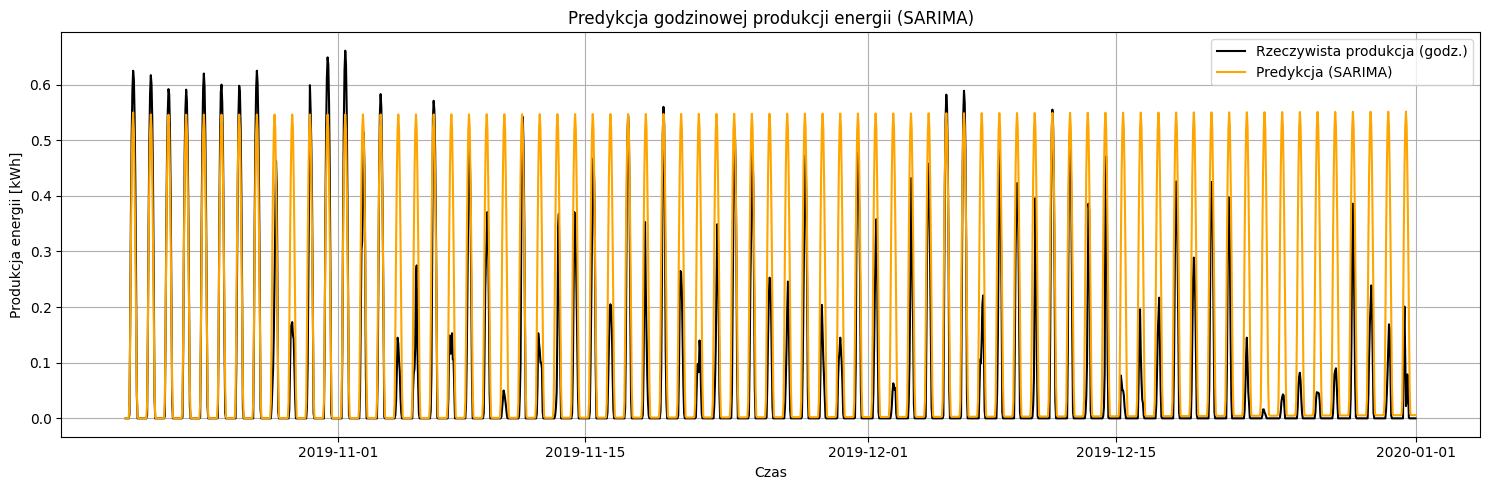

                    Czas  Rzeczywista produkcja  Predykowana produkcja  \
0    2019-10-20 00:00:00                    0.0               0.000025   
1    2019-10-20 01:00:00                    0.0               0.000037   
2    2019-10-20 02:00:00                    0.0               0.000038   
3    2019-10-20 03:00:00                    0.0               0.000065   
4    2019-10-20 04:00:00                    0.0               0.000841   
...                  ...                    ...                    ...   
1747 2019-12-31 19:00:00                    0.0               0.005741   
1748 2019-12-31 20:00:00                    0.0               0.005747   
1749 2019-12-31 21:00:00                    0.0               0.005752   
1750 2019-12-31 22:00:00                    0.0               0.005758   
1751 2019-12-31 23:00:00                    0.0               0.005763   

       Różnica  
0     0.000025  
1     0.000037  
2     0.000038  
3     0.000065  
4     0.000841  
...      

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Wczytanie danych ===
df = pd.read_csv("Produkcja_energii/ninja_pv_50.1400_20.0637_corrected.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df[['electricity']]

# === 2. Podział na zbiór treningowy/testowy ===
split_idx = int(len(df) * 0.8)
train, test = df.iloc[:split_idx], df.iloc[split_idx:]

# === 3. Budowa i trenowanie modelu SARIMA ===
# Ustawiamy parametry ręcznie:
# order = (p, d, q), seasonal_order = (P, D, Q, m)
# Zakładamy sezonowość dobową: m=24

order = (1, 2, 3)
seasonal_order = (1, 1, 1, 24)

print("Trwa trenowanie modelu SARIMA...")
model = SARIMAX(train['electricity'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# === 4. Prognoza ===
n_periods = len(test)
forecast = model_fit.forecast(steps=n_periods)

# === 5. Ocena ===
mae = mean_absolute_error(test['electricity'], forecast)
rmse = np.sqrt(mean_squared_error(test['electricity'], forecast))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# === 6. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['electricity'], label='Rzeczywista produkcja (godz.)', color='black')
plt.plot(test.index, forecast, label='Predykcja (SARIMA)', color='orange')
plt.title('Predykcja godzinowej produkcji energii (SARIMA)')
plt.xlabel('Czas')
plt.ylabel('Produkcja energii [kWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Tabela różnic ===
diff = forecast.values - test['electricity'].values
diff_df = pd.DataFrame({
    'Czas': test.index,
    'Rzeczywista produkcja': test['electricity'].values,
    'Predykowana produkcja': forecast.values,
    'Różnica': diff
})
print(diff_df)
